```Ecole Centrale Nantes
Option InfoIA
PAPY: Programmation avancée python
TP3.1 Application du cours
Année 2023-2024
Auteur: Lucas Lestandi
lucas.lestandi@ec-nantes.fr
V1.1
```

# Application directe du cours

**Durée 2h**

**Objectifs:** Mise en application de quelques libraries
- numpy
- matplotlib
- scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Pour se convaincre de l'efficacité de numpy

<div class="alert alert-info" role="alert">
    <b> Exercice : </b>On veut initialiser un tableau d'entiers allant de 1 à N, puis en calculer la somme. On pourra tester avec $N=10^6$ et <code>%%timeit</code> pour avoir une estimation stable du temps de calcul.
    Proposer 3 implémentations: 1)avec boucle for, 2) par compréhension, 3) avec numpy. <br>
    Que peut-on dire de la vitesse d'exécution? <br>
    Si l'on veut uniquement le résultat, on peut aussi se passer de l'initialisation de la liste (et donc de son cout mémoire). Qu'en est-il du temps de calcul?
</div>

In [26]:
N = 10**6

In [47]:
%%timeit
liste = []
for i in range(N+1):
    liste.append(i)
print(sum(liste))

500000500000
500000500000
500000500000
500000500000
500000500000
500000500000
500000500000
500000500000
475 ms ± 93.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
%%timeit
print(sum([i for i in range(N+1)]))

500000500000
500000500000
500000500000
500000500000
500000500000
500000500000
500000500000
500000500000
368 ms ± 74.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
%%timeit
print(sum(np.arange(start = 0, stop = N+1,step = 1, dtype = float)))

<magic-timeit>:1: RuntimeWarning: overflow encountered in scalar add


1784293664
1784293664
1784293664
1784293664
1784293664
1784293664
1784293664
1784293664
301 ms ± 94.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
%%timeit
print(sum(np.linspace(start = 0, stop = N ,num = N+1)))

500000500000.0
500000500000.0
500000500000.0
500000500000.0
500000500000.0
500000500000.0
500000500000.0
500000500000.0
344 ms ± 39.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## linalg : fonction basique
<div class="alert alert-info" role="alert">

<b> Exercice : </b> Calculer le déterminant et l'inverse de la matrice suivante. On vérifiera la qualité du calcul en calculant 
$||AA^{-1}-I||$. Comment améliorer le résultat? Suggestion: googler "conditionnement". 

$$
\left(\begin{array}{cc} 
1 & 2 & 3\\ 
0 & 5 & -4\\
-1 & 8 & -11.0000000001\\
\end{array}\right)
$$
</div>

In [98]:
A = np.matrix([[1, 2, 3],[0, 5, -4],[-1, 8, -11.000_000_000_1]], dtype = float)
#A = np.matrix([[1, 0, 0],[0, 1, 0],[0, 0, 1]], dtype = float)
print(A)
print(A[2,2])

A_inv = np.linalg.inv(A)
print(A_inv)
result  = A_inv*A-np.eye(3)

print(result)

print(np.linalg.cond(A))

[[  1.   2.   3.]
 [  0.   5.  -4.]
 [ -1.   8. -11.]]
-11.0000000001
[[ 4.59999962e+10 -9.19999924e+10  4.59999962e+10]
 [-7.99999934e+09  1.59999987e+10 -7.99999934e+09]
 [-9.99999917e+09  1.99999983e+10 -9.99999917e+09]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
1757817589809.7039


## Calcul des décimales de $\pi$

<div class="alert alert-info" role="alert">
    <b> Exercice : </b> Ecrire une programme qui calcule les décimales de $\pi$ par la méthode de Monte-Carlo. Le raisonnement est le suivant.<br>
    La surface d'un cercle est $S=\pi r^2$, ainsi, pour calculer $\pi$ il suffit d'évaluer la surface d'un cercle de rayon $r$ connu. Pour plus de simplicité, on choisit $r=1$ et on restreint le domaine au quart de cercle centré dans le coin carré de coté 1. C'est ici qu'intervient la méthode de Monte-Carlo, on va tirer au hasard des points dans ce carré. et compter ceux qui sont à l'intérieur du cercle. Pour un grand nombre de points, on obtient un bonne estimation de $\pi=\frac{pts \; intérieur}{pts \; extrieurs} \times 4$.
    <br>
    On affichera un graphe montrant l'évaluation, similaire à celui-ci pour illustrer la méthodes avec 50 points:
    <img src="monte-carlo.png" alt="MonteCarlo">
    <br>
    Et on observera la convergence de notre évaluation avec le graphe suivant. On fera attention à ne pas recalculer un nouveau cas pour chaque valeur de N.
    <img src="MC-convergence.png" alt="Convergence">
    <br>
    Mais on ne voit finalement pas grand chose sur le graphe, le suivant, en base logarithmique de l'erreur est beaucoup plus parlant:
    <img src="MC-convergence_log.png" alt="Convergence">
    <br>
    Enfin, on évaluera la variabilité de la méthode avec une petite étude statistique pour $N=10^4$ et $N=10^6$.
    <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">N</th>
    <th class="tg-0pky">Valeur moyenne</th>
    <th class="tg-0lax">Sigma</th>
    <th class="tg-0lax">Nombre de tests<br></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">10 000</td>
    <td class="tg-0pky">3.1423039999999998 </td>
    <td class="tg-0lax">0.014777184576231025</td>
    <td class="tg-0lax">50</td>
  </tr>
  <tr>
    <td class="tg-0pky">$10^6$<br></td>
    <td class="tg-0pky">3.1411283199999995<br></td>
    <td class="tg-0lax">0.001587272546729095</td>
    <td class="tg-0lax">50</td>
  </tr>
</tbody>
</table>
</div>

(0.0, 1.0)

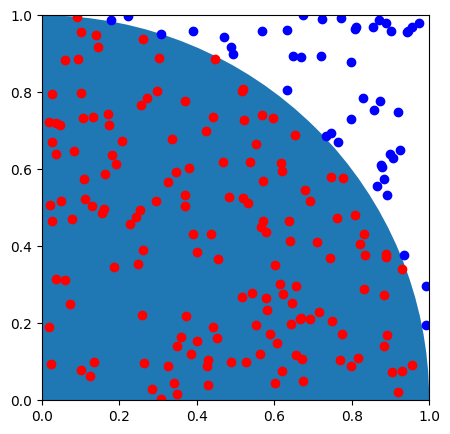

In [172]:
import matplotlib.pyplot as plt

# data
samples = 200
points = np.random.rand(samples, 2)

mask_in = np.linalg.norm(points, axis = 1)<1
points_in = points[mask_in]
points_out = points[~ mask_in]

# figure
fig1, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize=(5, 5))

plots_info = {'in' : (points_in, 'ro'),
              'out' : (points_out, 'bo')}

for key in plots_info.keys():
    data = plots_info[key][0]
    x = data[:,0]
    y = data[:,1]
    ax1.plot(x, y, plots_info[key][1])

ax1.add_patch(plt.Circle((0,0),1))
ax1.set_ylim(0,1)
ax1.set_xlim(0,1)

## Manipulation d'images

<div class="alert alert-info" role="alert">
    <b> ExerciceManipulation d'image  :  </b> On utilise ici scipy pour charger une image RGB dans un array à 3 dimensions (vertical, horizontal, couleur). Matplotlib permet de visualiser très facilement grace à imshow.
</div>

C:\Users\remi\AppData\Local\Temp\ipykernel_9184\2848473955.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f = misc.face()


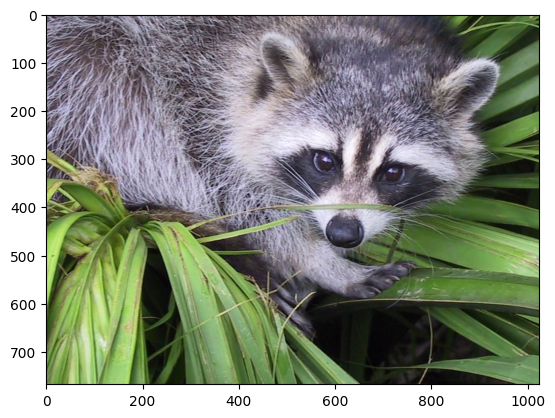

In [175]:
from scipy import misc
f = misc.face()

fig2, ax2 = plt.subplots()
ax2.imshow(f)

<div class="alert alert-info" role="alert">
    <b> Exercice Manipulation d'image  :  </b> Quelle est la dimension de l'image? Afficher les canaux un par un.
</div>

In [170]:
f.shape

(768, 1024, 3)

<div class="alert alert-info" role="alert">
    <b> Exercice Manipulation d'image  :  </b> Afficher l'image en noir et blanc.
</div>

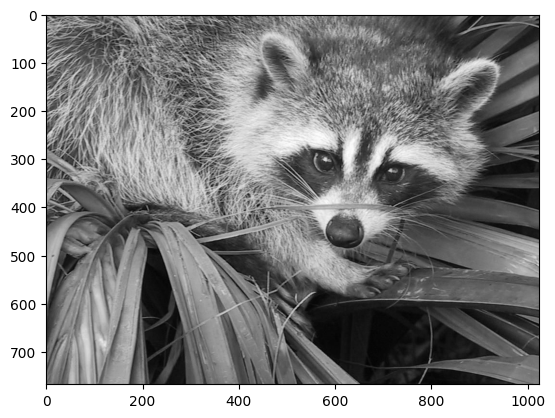

In [206]:
fgray = f.mean(axis = 2)
fig3, ax3 = plt.subplots()
ax3.imshow(fgray, cmap='gray', vmin=0, vmax=255)

<div class="alert alert-info" role="alert">
    <b> Exercice Manipulation d'image  :  </b> Créer un version noir et blanc de f si ce n'est déjà fait puis l'afficher en sautant une ligne sur deux. Que se passe-t-il?  De même, afficher l'image en miroire.
</div>

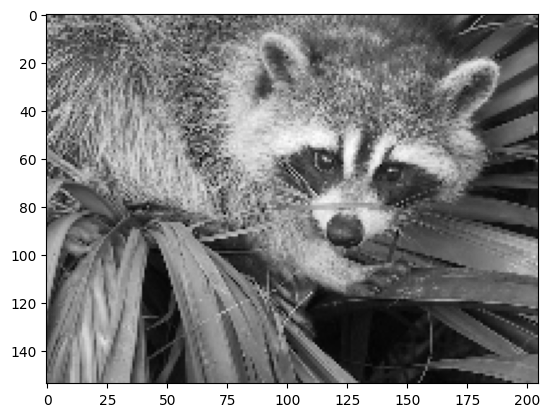

In [214]:
jump = 5
fig4, ax4 = plt.subplots()
ax4.imshow(fgray[::jump,::jump], cmap='gray', vmin=0, vmax=255)

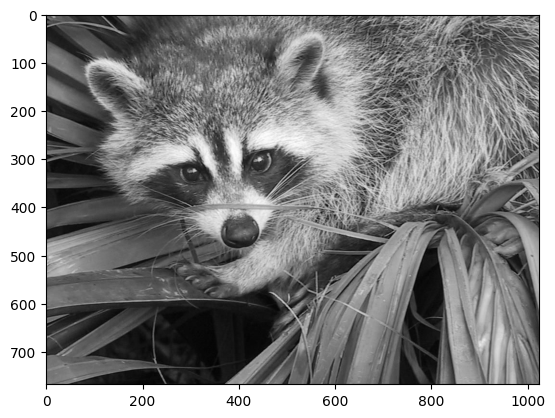

In [213]:
fig4, ax4 = plt.subplots()
ax4.imshow(fgray[::1,::-1], cmap='gray', vmin=0, vmax=255)

<div class="alert alert-info" role="alert">
    <b> Exercice Manipulation d'image  :  </b> Créer un masque circulaire pour rendre noir tous les pixels en dehors du cercle.
</div>

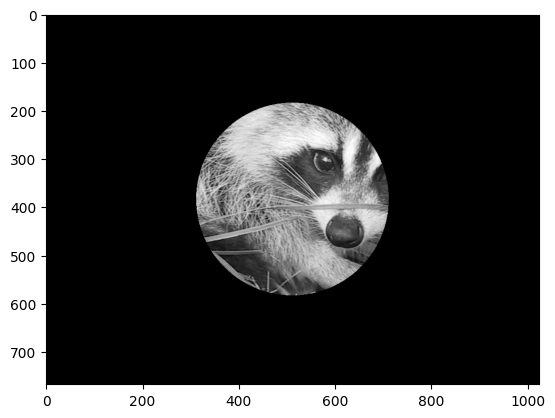

In [301]:
radius = 200

circular_mask = np.ones_like(fgray, dtype = bool)
center  = ((np.array(circular_mask.shape, dtype = float)-1)/2)
for index, value in np.ndenumerate(circular_mask): # It's really bad, you should just operate with matrixes and you know it
    if np.linalg.norm(np.array(index)-center)>=radius:
        circular_mask[index] = False

f_circular = fgray*circular_mask

fig5, ax5 = plt.subplots()
ax5.imshow(f_circular, cmap='gray', vmin=0, vmax=255)

<div class="alert alert-info" role="alert">
    <b> Exercice Manipulation d'image  :  </b> Créer une version binaire (blanc en dessous, noir au dessus du seuil) de l'image avec la valeur limite de votre choix.
</div>

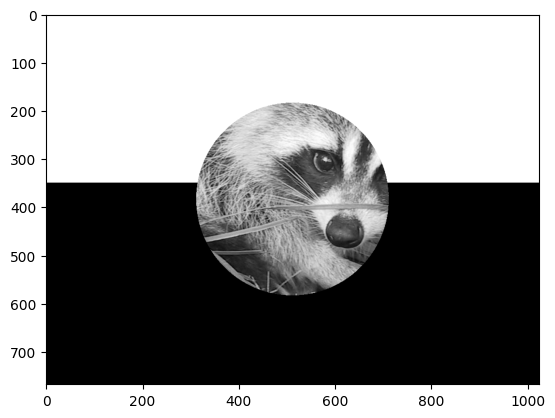

In [322]:
seuil = 350

binary_mask = np.concatenate((np.ones_like(fgray[:seuil,:], dtype = bool), np.zeros_like(fgray[seuil:,:], dtype = bool)), axis = 0)
f_circular_binary = fgray * circular_mask + 255*(binary_mask * ~circular_mask)
fig6, ax6 = plt.subplots()
ax6.imshow(f_circular_binary, cmap='gray', vmin=0, vmax=255)

<div class="alert alert-info" role="alert">
    <b> Exercice Manipulation d'image  :  </b> Calculer le gradient de cette image et l'afficher. On pourra se contenter d'un calcul au premier ordre avec les voisins direct. <br> 


Formule corrigé:


$$ ||\nabla p_{ij}||= \sqrt{(p_{i+1j}-p_{i-1j})^2+(p_{ij+1}-p_{ij-1})^2}$$ 

que l'on pourra, au besoin normaliser. Comparer avec les méthodes des librairies de traitement d'image telle <code>ndime,openCV,PIL</code> et en particulier le filtre de Sobel.
</div>

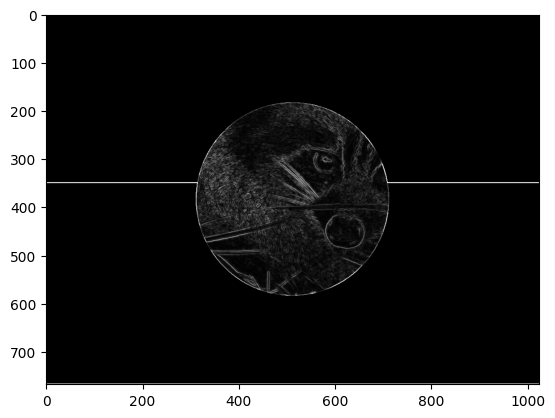

In [330]:
f_grads = np.sqrt((np.roll(f_circular_binary, 1, 0)-np.roll(f_circular_binary, -1, 0))**2 + (np.roll(f_circular_binary, 1, 1)-np.roll(f_circular_binary, -1, 1))**2 )

fig7, ax7 = plt.subplots()
ax7.imshow(f_grads, cmap='gray', vmin=0, vmax=255)

## Le jeux de la vie

<div class="alert alert-info" role="alert">
    <b> Exercice long : </b> Le Jeu de la vie est un automate cellulaire imaginé par John Horton Conway en 1970. Malgré des règles très simples, il est Turing-complet. C'est un jeu de simulation au sens mathématique. <br> 
    Lire le reste de la présentation <a href="https://fr.wikipedia.org/wiki/Jeu_de_la_vie"> wikipedia</a>. <br> <br> Programmer une version simple avec numpy et matplotlib. On pourra se satisfaire d'un tableau stockant toute la grille et d'une fonction qui avance le temps (en suivant les règles, bien-sûr).
</div>

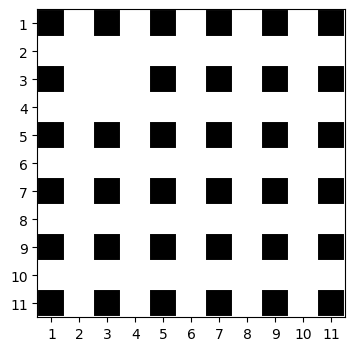

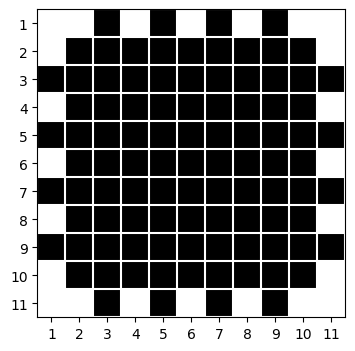

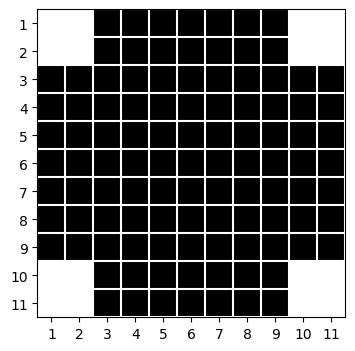

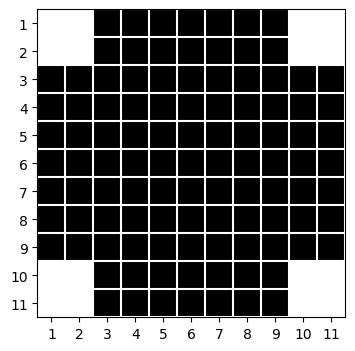

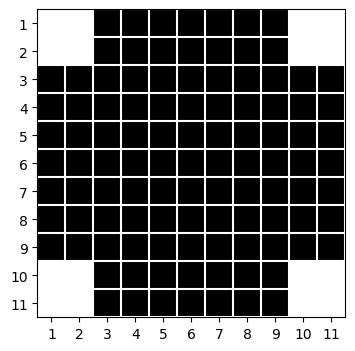

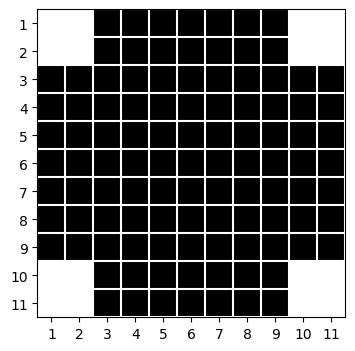

In [408]:
N = 11
grid = np.ones([N,N])
grid[0::2,0::2,] = 0
grid[2,2] = 1



def plot_grid(grid):
    lg_fig, lg_ax = plt.subplots(figsize=(4,4))
    lg_ax.imshow(grid, cmap = 'gray', vmin=0, vmax=1)
    # 1: white : alive
    # 0: black : dead
    # Major ticks
    lg_ax.set_xticks(np.arange(0, N, 1))
    lg_ax.set_yticks(np.arange(0, N, 1))
    # Labels for major ticks
    lg_ax.set_xticklabels(np.arange(1, N+1, 1))
    lg_ax.set_yticklabels(np.arange(1, N+1, 1))
    # Minor ticks
    lg_ax.set_xticks(np.arange(-.5, N, 1), minor=True)
    lg_ax.set_yticks(np.arange(-.5, N, 1), minor=True)
    # Gridlines based on minor ticks
    lg_ax.grid(which='minor', color='w', linestyle='-', linewidth=1.5)
    # Remove minor ticks
    lg_ax.tick_params(which='minor', bottom=False, left=False)
    plt.show()
    return None


def next_step(grid):
    grid_paded = np.pad(grid,((1,1),(1,1)), mode='constant')
    score = sum([np.roll(grid_paded, (i, j), (0,1)) for i in [0,1,-1] for j in [0,1, -1] if i!=0 or j!=0])[1:-1,1:-1]
    return np.where((score==3) | ((score==2) & (grid==1)), 1, 0)


plot_grid(grid)
while input("Pour arreter appuyez sur 'A'")!='A':
    grid = next_step(grid)
    plot_grid(grid)